In [4]:
#Importing required libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# assigning path of eda.csv file to variable eda_data_path
retail_warehouse_data_file_path = r'D:\Amazon_Project\Python_Project\NA_Retail_Dataset_EDA\exploratory_data_analysis_file.csv'

In [6]:
#Reading csv file
retail_warehouse_data = pd.read_csv(retail_warehouse_data_file_path)

In [8]:
# display top 5 rows
retail_warehouse_data.head()  

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22-06-2019,Arizona,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29-12-2019,Arizona,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02-03-2019,Arkansas,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12-01-2019,Arkansas,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28-11-2019,arkansas,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [9]:
#Displaying statistical info of eda data
retail_warehouse_data.describe() 

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


In [10]:
print(f'Shape of eda data is: {retail_warehouse_data.shape}')

Shape of eda data is: (500, 16)


In [11]:
#Whether any columns contains null value or not
print(retail_warehouse_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


In [12]:
#Analyzing datatype of each column
print(retail_warehouse_data.dtypes)

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


In [13]:
#Data type of date column is object instead of datetime, So fixing this problem
retail_warehouse_data.date = pd.to_datetime(retail_warehouse_data['date'])

In [14]:
print(retail_warehouse_data.date.dtypes)      

datetime64[ns]


In [15]:
print(retail_warehouse_data.dtypes)  # Now data in date column is in datetime64 form

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object


In [16]:
#Analyzing order_id
#Checking whether order_id is unique or not
if retail_warehouse_data.order_id.is_unique:    
    print("Data in order_id is unique")      # execute when 'if' block will true
else:
    print("Data in order_id is not unique")  # execute when 'else' block will true

Data in order_id is unique


In [17]:
#Analyzing nearest_warehouse
retail_warehouse_data['nearest_warehouse'].unique()

array(['Arizona', 'Arkansas', 'arkansas', 'California', 'california',
       'arizona'], dtype=object)

In [18]:
#Arizona and arizona are same but here they both are different so make it same¶
#Similarly California and california are same
#To solve this problem, convert data in nearest_warehouse in title case
retail_warehouse_data.nearest_warehouse = retail_warehouse_data.nearest_warehouse.str.title()

In [19]:
retail_warehouse_data['nearest_warehouse'].unique()

array(['Arizona', 'Arkansas', 'California'], dtype=object)

In [22]:
#Checking quantities of near_warehouse
warehouses = retail_warehouse_data['nearest_warehouse'].value_counts()
print(warehouses)

Arizona       197
Arkansas      184
California    119
Name: nearest_warehouse, dtype: int64


Text(0, 0.5, 'Counts')

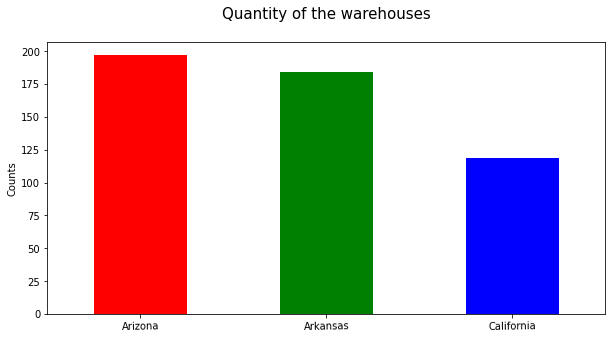

In [25]:
#Visualizing data using bar chart
warehouses.plot(kind='bar', rot=1, color=['r','g','b'], figsize=(10,5))
plt.title("Quantity of the warehouses\n", size=15)
plt.ylabel("Counts")

Text(0.5, 1.0, 'Quantity of warehouses')

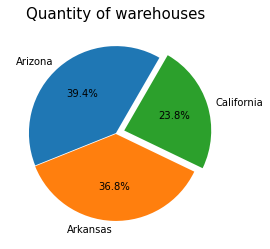

In [27]:
#Visualizing data using pie chart
plt.pie(warehouses,
        labels=['Arizona',"Arkansas",'California'],
        autopct="%0.1f%%",
        explode=[0,.01,0.1],
        startangle=60,radius=1)
plt.title("Quantity of warehouses", size=15)

In [28]:
#It seems that Arizona is nearest warehouse accessible to mostly customer

In [29]:
#Analyzing order_price and order_total
#order_price: Price before any discounts and delivery charges
#order_total: Price after all discounts and/or delivery charges are applied

In [30]:
#Displaying Record whose order price is maximum
retail_warehouse_data[retail_warehouse_data.order_price == retail_warehouse_data.order_price.max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Arizona,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


In [31]:
#Displaying Record whose order price is minimum
retail_warehouse_data[retail_warehouse_data.order_price == retail_warehouse_data.order_price.min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,California,"[('iStream', 2), ('Candle Inferno', 1)]",585,91.79,-37.800798,145.005428,25,639.29,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False


In [32]:
#Now checking whether the order_total(after all discount and delivery charges are applied) is correct or there is some problem in it
retail_warehouse_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,7960,52.28,5,10789.79
8,25390,107.58,10,22958.58
9,13320,62.26,15,11384.26


In [33]:
#It looks like that there is an error in order_total feature of eda data, So fixing this¶
order_final_list = list()   

In [34]:
#Computing and appending order_final in 'order_final_list'
for i in range(0,len(retail_warehouse_data['order_price'])):
    if (retail_warehouse_data['coupon_discount'][i] != 0):
        dis_price = (retail_warehouse_data['order_price'][i]) * (retail_warehouse_data['coupon_discount'][i] / 100)   # apply coupon to original price
        price = retail_warehouse_data['order_price'][i] + retail_warehouse_data['delivery_charges'][i] - dis_price    # adding delivery charges and removig the discount price from the order_total
        final_price = np.round(price,2)
        order_final_list.append(final_price) 
       
    
    else:
        final_price = retail_warehouse_data['order_price'][i] + retail_warehouse_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place
        order_final_list.append(final_price)                  # appending final_price to order_final_list

[11059.89,
 9142.71,
 9668.87,
 21137.61,
 6934.29,
 7100.22,
 13089.84,
 7614.28,
 22958.58,
 11384.26,
 31973.25,
 10464.79,
 19104.75,
 19785.64,
 31979.78,
 15196.35,
 11188.19,
 1304.52,
 6268.89,
 6294.86,
 13787.61,
 4823.05,
 17111.01,
 5464.28,
 17539.19,
 2273.98,
 20346.04,
 5663.28,
 17141.8,
 19626.68,
 12287.24,
 13511.81,
 7900.74,
 16989.54,
 19161.09,
 3280.44,
 10186.45,
 12822.12,
 11620.28,
 13075.21,
 5717.79,
 12032.83,
 8437.45,
 8131.57,
 13822.01,
 7446.01,
 10598.3,
 8836.33,
 28195.73,
 19420.81,
 7977.82,
 9999.06,
 2346.86,
 15421.05,
 2302.95,
 41406.93,
 4470.72,
 16606.2,
 3579.02,
 15168.21,
 7036.6,
 37215.32,
 17973.2,
 14845.8,
 5379.13,
 16562.47,
 5114.47,
 52455.54,
 9619.79,
 18367.62,
 589729.3,
 26616.53,
 8802.6,
 24293.23,
 3913.42,
 12210.93,
 2690.06,
 28056.18,
 31758.08,
 9134.23,
 3416.42,
 14445.09,
 14646.58,
 7833.23,
 4490.22,
 24597.54,
 12808.11,
 15448.61,
 12835.27,
 9143.57,
 13390.16,
 5619.21,
 23495.54,
 25571.24,
 27901.05,


In [35]:
print(f'Items (Price) in list is: {len(order_final_list)}')

Items (Price) in list is: 500


In [36]:
#Converting list to Series and set it in order_total
retail_warehouse_data['order_total'] = pd.Series(order_final_list)

In [37]:
#Removing outlier
#Using IQR
#Checking for Outlier in order_total
Q1_order_total = retail_warehouse_data['order_total'].quantile(0.25)     # Lower Quartile
Q3_order_total = retail_warehouse_data['order_total'].quantile(0.75)     # Upper Quartile

In [38]:
print(f'Lower Quartile is: {Q1_order_total}') 
print(f'Upper Quartile is: {Q3_order_total}')

Lower Quartile is: 6388.34
Upper Quartile is: 17926.88


In [39]:
#Finding IQR
# upper quartile - lower quartile

IQR_order_total = Q3_order_total - Q1_order_total  

In [40]:
print(f'Value of IQR_order_total is: {IQR_order_total}')

Value of IQR_order_total is: 11538.54


In [41]:
#Finding lower and upper limit
lower_limit_order_total = Q1_order_total - 1.5 * IQR_order_total
upper_limit_order_total = Q3_order_total + 1.5 * IQR_order_total

In [42]:
print(f'Lower limit of order_total is: {lower_limit_order_total}')
print(f'Upper limit of order_total is: {upper_limit_order_total}')

Lower limit of order_total is: -10919.470000000001
Upper limit of order_total is: 35234.69


In [43]:
#Any value less then lower limit and greater then upper limit is outlier
#Displaying all outlier values
outlier_in_eda_data = retail_warehouse_data[(retail_warehouse_data['order_total'] < lower_limit_order_total) | (retail_warehouse_data['order_total'] > upper_limit_order_total)]

In [44]:
outlier_in_eda_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
55,ORD442452,ID0582560124,2019-08-26,Arkansas,"[('Alcon 10', 2), ('Toshika 750', 2), ('pearTV...",43520,62.93,-37.822185,144.978657,5,41406.93,Winter,True,0.8949,was not described accurately phone was labeled...,False
61,ORD028755,ID0283255338,2019-06-13,California,"[('iAssist Line', 2), ('pearTV', 2), ('Thunder...",37150,65.32,-37.803982,145.007587,0,37215.32,Winter,True,1.2762,i order google pixel 2xl and it's come google ...,False
67,ORD158007,ID3106293373,2019-02-22,Arizona,"[('iStream', 1), ('Olivia x460', 1), ('Alcon 1...",61619,79.39,-37.806607,144.932452,15,52455.54,Summer,False,1.4520,mom loves it i bought this for my mom and she ...,True
70,ORD122655,ID1725216621,2019-06-28,Arizona,"[('Universe Note', 2), ('Thunder line', 1), ('...",655164,81.70,-37.804091,144.961911,10,589729.30,Winter,True,1.6176,five stars excellent phone! i do not understan...,True
156,ORD127141,ID0777789266,2019-03-02,Arizona,"[('Lucent 330S', 2), ('pearTV', 1), ('iAssist ...",69685,92.70,-37.806827,144.954899,0,69777.70,Summer,True,0.9475,remarkable phone with an unbeatable price. rem...,True
237,ORD420200,ID2189162941,2019-06-12,Arizona,"[('Alcon 10', 1), ('Olivia x460', 1), ('pearTV...",865916,92.90,-37.811745,144.956404,15,736121.50,Summer,True,0.8274,five stars great phone,True
289,ORD339649,ID2207661056,2019-08-16,Arizona,"[('Alcon 10', 1), ('Thunder line', 2), ('Unive...",597240,79.91,-37.801295,144.945787,5,567457.91,Winter,True,1.2716,this was bought to replace my old candle with ...,True
299,ORD379975,ID0144730304,2019-01-13,Arkansas,"[('iAssist Line', 1), ('Alcon 10', 1)]",96385,77.51,-37.819260,144.957538,25,72366.26,Summer,False,1.0590,good quality great price,True
307,ORD346356,ID0312718298,2019-02-10,Arizona,"[('Candle Inferno', 1), ('Thunder line', 2), (...",63500,107.18,-37.803331,144.959131,25,47732.18,Spring,True,1.4855,five stars love phone,True
313,ORD496181,ID0781107765,2019-09-20,California,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",461736,87.31,-37.818497,145.015417,25,346389.31,Spring,False,2.0115,so good. have not had time to use it much so f...,True


In [45]:
#Above records is outlier, So removing it from original data
print(f'Total outlier records in eda data is: {outlier_in_eda_data.shape[0]}')

Total outlier records in eda data is: 18


In [47]:
#Any data which is greater than lower limit and less than upper limit is Not an Outlier
data_without_outlier = retail_warehouse_data[(retail_warehouse_data['order_total'] > lower_limit_order_total) & (retail_warehouse_data['order_total'] < upper_limit_order_total)]

In [48]:
print(f'Total numbers of records without outliers is: {data_without_outlier.shape[0]}')

Total numbers of records without outliers is: 482


In [49]:
#Displaying top 5 records of data without outliers
data_without_outlier.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Arizona,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Arizona,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Arkansas,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Arkansas,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Arkansas,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [50]:
#Analyzing how many customers are happy with sevice
data_without_outlier['is_happy_customer'].unique()

array([ True, False])

In [51]:
satisfaction = data_without_outlier['is_happy_customer'].value_counts()
print(satisfaction)

True     344
False    138
Name: is_happy_customer, dtype: int64


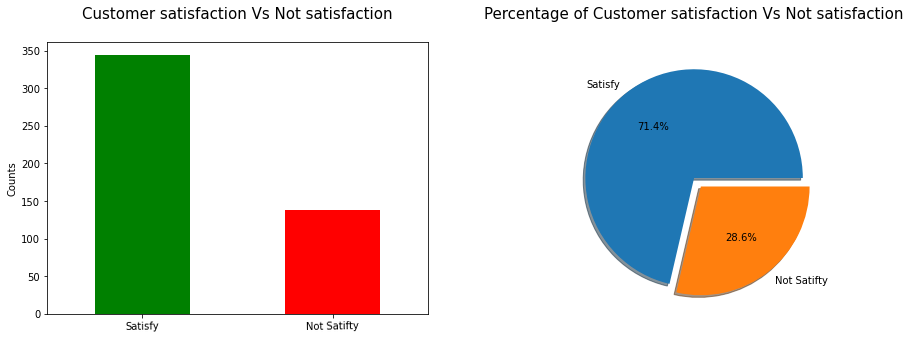

In [52]:
#Visualizing Data
plt.figure(figsize=(15,5))

plt.subplot(121)
satisfaction.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Satisfy','Not Satifty'])
plt.ylabel('Counts')
plt.title("Customer satisfaction Vs Not satisfaction\n", size=15)


plt.subplot(122)
plt.pie(satisfaction, labels=['Satisfy','Not Satifty'], autopct="%.1f%%",explode=[0,0.1],shadow=True)
plt.title("Percentage of Customer satisfaction Vs Not satisfaction\n", size=15)

plt.show()